# Exercici 1

In [103]:
import pandas as pd
dades=pd.read_csv("DelayedFlights.csv")
print(dades.head())

   Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
0           0  2008      1           3          4   2003.0        1955   
1           1  2008      1           3          4    754.0         735   
2           2  2008      1           3          4    628.0         620   
3           4  2008      1           3          4   1829.0        1755   
4           5  2008      1           3          4   1940.0        1915   

   ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
0   2211.0        2225            WN  ...     4.0     8.0          0   
1   1002.0        1000            WN  ...     5.0    10.0          0   
2    804.0         750            WN  ...     3.0    17.0          0   
3   1959.0        1925            WN  ...     3.0    10.0          0   
4   2121.0        2110            WN  ...     4.0    10.0          0   

   CancellationCode  Diverted  CarrierDelay  WeatherDelay NASDelay  \
0                 N         0           NaN         

In [106]:
original_df = dades[["UniqueCarrier","DepTime","CRSDepTime","ArrTime","CRSArrTime","AirTime","ActualElapsedTime",
            "Origin","Dest","Distance","Cancelled","Diverted"]]
print(original_df.head())

  UniqueCarrier  DepTime  CRSDepTime  ArrTime  CRSArrTime  AirTime  \
0            WN   2003.0        1955   2211.0        2225    116.0   
1            WN    754.0         735   1002.0        1000    113.0   
2            WN    628.0         620    804.0         750     76.0   
3            WN   1829.0        1755   1959.0        1925     77.0   
4            WN   1940.0        1915   2121.0        2110     87.0   

   ActualElapsedTime Origin Dest  Distance  Cancelled  Diverted  
0              128.0    IAD  TPA       810          0         0  
1              128.0    IAD  TPA       810          0         0  
2               96.0    IND  BWI       515          0         0  
3               90.0    IND  BWI       515          0         0  
4              101.0    IND  JAX       688          0         0  


# Exercici 2

Resum estadístic:

In [107]:
print(original_df.describe().astype(int))

       DepTime  CRSDepTime  ArrTime  CRSArrTime  AirTime  ActualElapsedTime  \
count  1936758     1936758  1929648     1936758  1928371            1928371   
mean      1518        1467     1610        1634      108                133   
std        450         424      548         464       68                 72   
min          1           0        1           0        0                 14   
25%       1203        1135     1316        1325       58                 80   
50%       1545        1510     1715        1705       90                116   
75%       1900        1815     2030        2014      137                165   
max       2400        2359     2400        2400     1091               1114   

       Distance  Cancelled  Diverted  
count   1936758    1936758   1936758  
mean        765          0         0  
std         574          0         0  
min          11          0         0  
25%         338          0         0  
50%         606          0         0  
75%         998

Quantes dades falten per columna:

In [108]:
for i in range(original_df.columns.size):
    print("Numero de missing data de la columna",original_df.columns[i],":",original_df.iloc[:,i].isnull().sum())

Numero de missing data de la columna UniqueCarrier : 0
Numero de missing data de la columna DepTime : 0
Numero de missing data de la columna CRSDepTime : 0
Numero de missing data de la columna ArrTime : 7110
Numero de missing data de la columna CRSArrTime : 0
Numero de missing data de la columna AirTime : 8387
Numero de missing data de la columna ActualElapsedTime : 8387
Numero de missing data de la columna Origin : 0
Numero de missing data de la columna Dest : 0
Numero de missing data de la columna Distance : 0
Numero de missing data de la columna Cancelled : 0
Numero de missing data de la columna Diverted : 0


Columnes noves:

In [109]:
df = original_df.copy()
df['Velocitat Mitja'] = df["Distance"]/df['AirTime']
df["Retard"]=df["CRSArrTime"]-df["ArrTime"]
df["Recorregut"]=df["Origin"]+"-"+df["Dest"]
df["Data"]=dades["Year"].astype(str)+"-"+dades["Month"].astype(str)+"-"+dades["DayofMonth"].astype(str)
print(df[0:3])

  UniqueCarrier  DepTime  CRSDepTime  ArrTime  CRSArrTime  AirTime  \
0            WN   2003.0        1955   2211.0        2225    116.0   
1            WN    754.0         735   1002.0        1000    113.0   
2            WN    628.0         620    804.0         750     76.0   

   ActualElapsedTime Origin Dest  Distance  Cancelled  Diverted  \
0              128.0    IAD  TPA       810          0         0   
1              128.0    IAD  TPA       810          0         0   
2               96.0    IND  BWI       515          0         0   

   Velocitat Mitja  Retard Recorregut      Data  
0         6.982759    14.0    IAD-TPA  2008-1-3  
1         7.168142    -2.0    IAD-TPA  2008-1-3  
2         6.776316   -54.0    IND-BWI  2008-1-3  


In [110]:
print(df.groupby("UniqueCarrier")["Velocitat Mitja"].describe())

                  count      mean       std       min       25%       50%  \
UniqueCarrier                                                               
9E              51569.0  6.154878  1.527270  0.921053  5.489362  6.250000   
AA             190910.0  7.259712  1.048810  1.493333  6.675676  7.356784   
AQ                744.0  6.162694  1.746267  1.853659  4.761905  5.821429   
AS              39010.0  6.973870  1.091505  0.861111  6.480769  7.098485   
B6              54925.0  6.950537  1.871220  1.364964  6.209302  7.179245   
CO              99731.0  7.212533  1.152749  1.489362  6.714473  7.362385   
DL             113728.0  6.957986  1.097148  1.168750  6.333333  7.000000   
EV              81762.0  6.181359  3.492878  0.731034  5.448980  6.355263   
F9              28224.0  7.293447  0.863100  3.438710  6.740741  7.253012   
FL              70969.0  6.833310  0.903602  2.316327  6.317073  6.888000   
HA               7472.0  6.217539  1.645362  0.560440  4.857143  5.821429   

In [111]:
print(df.groupby("UniqueCarrier")["Retard"].describe())

                  count        mean         std     min    25%   50%    75%  \
UniqueCarrier                                                                 
9E              51617.0  -15.862100  377.079222 -1613.0  -98.0 -56.0 -11.00   
AA             191062.0   48.944918  512.442683 -2395.0  -95.0 -37.0  -8.00   
AQ                744.0    4.604839  286.522929  -578.0  -53.0 -14.0  -5.75   
AS              39032.0   14.737036  404.381716 -2354.0  -80.0 -26.0  -6.00   
B6              55031.0  128.514819  658.583238 -2397.0 -101.0 -34.0  -4.00   
CO              99801.0   72.359315  540.561333 -2358.0  -83.0 -22.0  -2.00   
DL             113812.0   30.265886  456.223532 -2388.0  -83.0 -29.0  -7.00   
EV              81811.0  -24.947489  346.924624 -2355.0  -99.0 -49.0 -11.00   
F9              28228.0   92.197393  545.869485 -1296.0  -60.0 -18.0  -6.00   
FL              70994.0   39.232245  479.325336 -2398.0  -88.0 -31.0  -8.00   
HA               7481.0   28.503542  404.962108 -131

Taula de les 10 aerolínies més endarrerides:

In [116]:
aerolinies = df.groupby("UniqueCarrier")["Retard"].sum().reset_index().sort_values("Retard",ascending=False)
print(aerolinies[:10])

   UniqueCarrier     Retard
1             AA  9351514.0
17            WN  7606220.0
5             CO  7221532.0
4             B6  7072299.0
15            UA  5603314.0
16            US  3733370.0
6             DL  3444621.0
9             FL  2785254.0
8             F9  2602548.0
12            NW  2010745.0


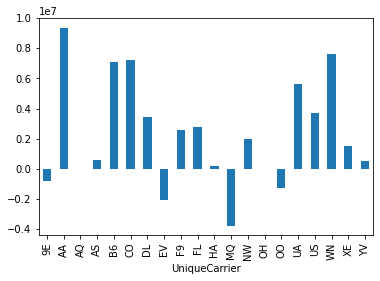

In [113]:
df.groupby("UniqueCarrier")["Retard"].sum().plot(kind="bar")

Els 20 vols més llargs:

In [117]:
print(df.sort_values(by="Distance",ascending=False)[:20])

        UniqueCarrier  DepTime  CRSDepTime  ArrTime  CRSArrTime  AirTime  \
1255581            CO   2001.0        1955   1126.0        1130    543.0   
1926346            CO   2333.0        2055   1348.0        1120    528.0   
718062             CO   1345.0        1335   1826.0        1810    620.0   
1928077            CO   2135.0        2055   1148.0        1120    523.0   
173695             CO   1326.0        1320   1912.0        1920    621.0   
1928078            CO   1359.0        1335   2022.0        1935    637.0   
870877             CO   1357.0        1335   1817.0        1810    592.0   
173676             CO   1334.0        1320   1932.0        1920    617.0   
1926347            CO   1441.0        1335   2123.0        1935    635.0   
721700             CO   1352.0        1335   1811.0        1810    600.0   
1257118            CO   1426.0        1335   1844.0        1810    588.0   
871310             CO   1355.0        1335   1808.0        1810    581.0   
1619713     

Els 20 vols més endarrerits:

In [118]:
print(df.sort_values(by="Retard",ascending=False)[:20])

        UniqueCarrier  DepTime  CRSDepTime  ArrTime  CRSArrTime  AirTime  \
705962             AA   1930.0        1905      1.0        2359    134.0   
293950             F9   1926.0        1915      1.0        2359    136.0   
1076347            DL   1634.0        1556      1.0        2359    246.0   
1188708            FL   2306.0        2259      1.0        2359     98.0   
335637             AA   2252.0        2240      1.0        2359    109.0   
530588             AA   2251.0        2240      1.0        2359    114.0   
1591069            HA   1523.0        1515      1.0        2359    313.0   
1477461            US   2221.0        2206      1.0        2359     84.0   
1562118            OO   2239.0        2233      1.0        2359     63.0   
1518702            CO   1556.0        1550      1.0        2359    277.0   
869108             B6   1612.0        1550      1.0        2359    250.0   
713295             B6   2059.0        2035      1.0        2359    143.0   
1907848     

Endarreriment mig de cada aerolinia:

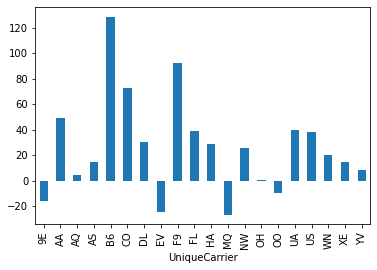

In [119]:
df.groupby("UniqueCarrier")["Retard"].mean().plot(kind="bar")

Desviació estandard de l'endarreriment de cada aerolinia:

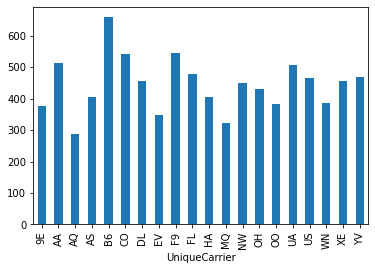

In [120]:
df.groupby("UniqueCarrier")["Retard"].std().plot(kind="bar")

Nº de vols que han fet les 20 aerolines amb més vols:

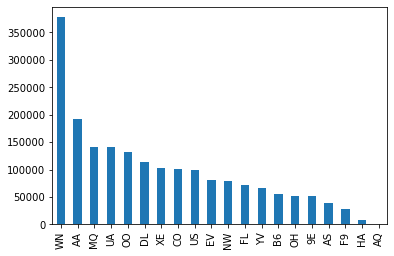

In [121]:
df["UniqueCarrier"].value_counts()[:20].plot(kind="bar")

# Exercici 3
Exportar el data set amb les noves columnes:

In [102]:
df.to_csv(r"RetardAerolinies.csv",index=False)

In [105]:
new_df=pd.read_csv("RetardAerolinies.csv")
print(new_df.head())

  UniqueCarrier  DepTime  CRSDepTime  ArrTime  CRSArrTime  AirTime  \
0            WN   2003.0        1955   2211.0        2225    116.0   
1            WN    754.0         735   1002.0        1000    113.0   
2            WN    628.0         620    804.0         750     76.0   
3            WN   1829.0        1755   1959.0        1925     77.0   
4            WN   1940.0        1915   2121.0        2110     87.0   

   ActualElapsedTime Origin Dest  Distance  Cancelled  Diverted  \
0              128.0    IAD  TPA       810          0         0   
1              128.0    IAD  TPA       810          0         0   
2               96.0    IND  BWI       515          0         0   
3               90.0    IND  BWI       515          0         0   
4              101.0    IND  JAX       688          0         0   

   Velocitat Mitja  Retard Recorregut      Data  
0         6.982759    14.0    IAD-TPA  2008-1-3  
1         7.168142    -2.0    IAD-TPA  2008-1-3  
2         6.776316   -54.0